# "Probability Distributions"
> "Summary of probability distributions"

- toc:true
- comments: true
- author: Dinesh Ladi
- categories: [probability]

## Introduction

Random Variable is a functon that maps from the world of random processes to real numbers. Random variable is denoted by symbol $X$. The randomness is due to that fact that we have a random experiment. Random Variable can be discrete or continuous. 

Given any random variable, it would be helpful to understand its behaviour through the lens of probability. A **distribution** of the random variable might be helpful to understand the same. 

The probability mass function (PMF) of a discrete random variables $X$ is defined by $P(X = x)$. PMF of $X$ should follow some criteria. 

* Non negative. $P(X=x) > 0$ if $x = x_j$ else 0 
* Sum = 1. $\sum\limits_{i=1}^{\infty} P(X=x_j) = 1 $ 

The probability density function (PDF) of a continuous random variables $X$ is defined by $f(x)$. PDF of $X$ should follow some criteria. 


* Non negative. $f(x) >= 0$ 
* Integrates to 1. $\int_{-\infty}^{\infty} f(x)dx = 1 $ 

 Cumulative Density Function is the accumulated area under PDF. CDF of $X$ is give by 

$$ F(x) = \int_{-\infty}^{x} f(t)dt $$

BY definition of CDF and fundamental theorem of calculus,

$$P(a < X <= b) = F(b) - F(a) = \int_{a}^{b} f(x)dx $$

To get a desired probability, integrate the PDF over the appropriate range.

## Continuous Probability Distributions

### Uniform Distribution
A uniform random variable on interval (a,b) is a completely random number between a and b. PDF is constant over the interval. The PDF for the same is 

$$ f(x) = \Bigg\{ \begin{array}{c}
  \frac{1}{b-a},\quad \text{if } a < x < b, \\\
 0, \quad \text{otherwise.} \\
  \end{array} $$

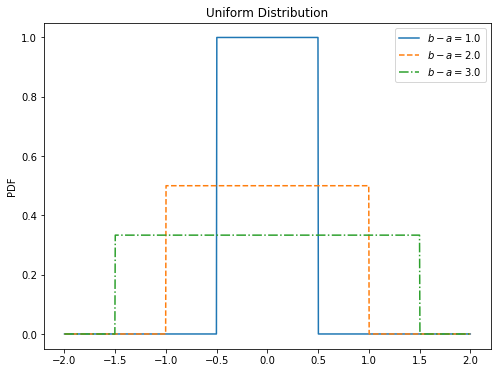

In [7]:
#collapse-hide
from scipy.stats import norm,uniform
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

W_values = [1.0, 2.0, 3.0]
linestyles = ['-', '--', '-.']
mu = 0
x = np.linspace(-2, 2, 1000)

for W, ls in zip(W_values, linestyles):
    left = mu - 0.5 * W
    dist = uniform(left, W)

    plt.plot(x, dist.pdf(x), ls=ls, label=rf'$b-a = {W}$')

plt.legend(loc='best')
plt.title('Uniform Distribution')
plt.ylabel('PDF')
plt.show()


### Gaussian Distribution
Gaussian or Normal Distribution for an random variable $X$ with mean $\mu$ and variance $\sigma^2$ has the following probability density function. 

$$ f(x) \sim N(\mu|\sigma^2) $$

$$ f(x) \sim \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \bigg[-\frac{1}{2}\bigg( \frac{x-\mu}{\sigma}\bigg)^2 \bigg] } $$


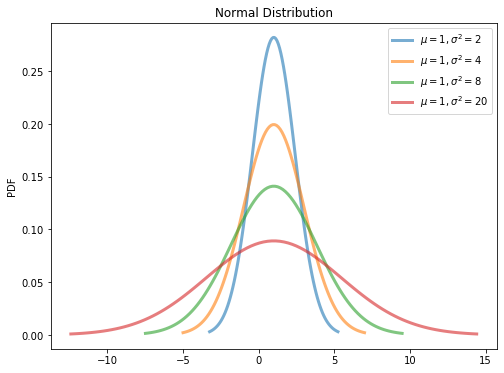

In [2]:
#collapse-hide
from scipy.stats import norm
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

for mu,var in zip([1,1,1,1],[2,4,8,20]):
    sigma = np.sqrt(var)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, lw=3, alpha=0.6, label= f"$\mu = {mu},\sigma^2 = {var}$")
plt.legend(loc='best')
plt.title('Normal Distribution')
plt.ylabel('PDF')
plt.show()

### Exponential Distribution
Exponential distribution is a continuous probability distribution is characterized by parameter $\lambda$ to model time between events in a Poisson process. The probability density function for the same is

$$f(x) = \lambda e^{-\lambda x} $$ 

$$ \mu = \frac{1}{\lambda} $$

$$ \sigma^2  = \frac{1}{\lambda^2} $$

The corresponding CDF is 

$$ F(x) = 1 - e^{-\lambda x}, \quad x > 0 $$


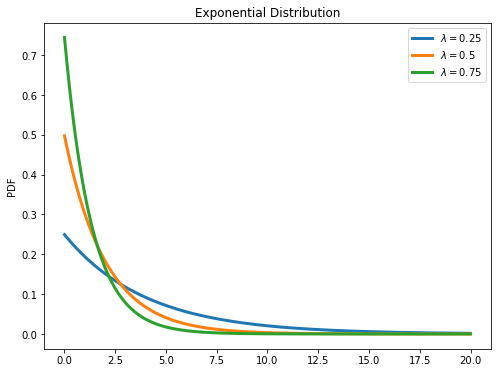

In [3]:
#collapse-hide
def exponential(x,rate):
    return rate*np.exp(-rate*x)

t = np.arange(0.01, 20, 0.01)
for rate in [0.25,0.5,0.75]:
    d = exponential(t,rate)
    plt.plot(t, d, linewidth=3, label = f"$\lambda = {rate}$")
    plt.legend(loc='best')
plt.title('Exponential Distribution')
plt.ylabel('PDF')
plt.show()

### Gamma Distribution
Gamma distribution is a continuous probability distribution characterized by parameters shape $\alpha$ and rate $\beta$. The probability density function for the same is.

$$ P(X = x) =  \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x } $$ where $\Gamma(\alpha)$ is the Gamma function. For all positive integers, $\Gamma(\alpha) = (\alpha-1)! $ 

$$\mu = \frac{\alpha}{\beta} $$

$$\sigma^2 = \frac{\alpha}{\beta^2} $$


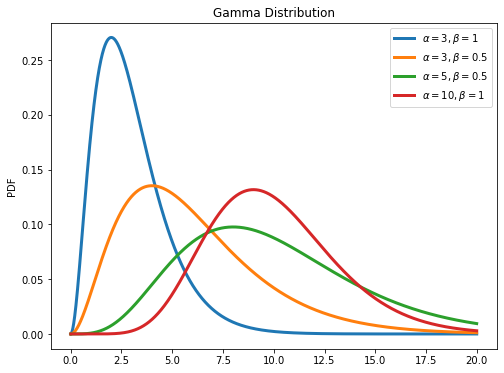

In [4]:
#collapse-hide
def Gamma(x,shape,rate):
    return (rate**shape)*(x**(shape-1))*np.exp(-rate*x)/factorial(shape-1)

t = np.arange(0.01, 20, 0.01)
for shape,rate in zip([3,3,5,10],[1,0.5,0.5,1]):
    d = Gamma(t,shape,rate)
    plt.plot(t, d, linewidth=3,label = rf"$\alpha = {shape},\beta = {rate}$")
    plt.legend(loc='best')
plt.title('Gamma Distribution')
plt.ylabel('PDF')
plt.show()

## Discrete Probability Distributions
### Bernoulli Distribution
Bernoulli distribution is a discrete probability distribution of a single trail that takes value 1 with probability $p$ and value 0 with probability $1-p$. The probability mass function for the same is. 
$$ P(X=x) =  p^x (1-p)^{1-x} $$

$$ \mu = p $$

$$ \sigma^2 =  p(1-p) $$

### Binomial Distribution
Binomial distribution is a discrete probability distribution for number of successes in $n$ independent Bernoulli trails. Each trail has two possible outcomes either success with probability $p$ or failure with probability $1-p$. probability mass function is. 
$$ P(X=x) =  {n \choose x} p^x (1-p)^{n-x} $$

$$ \mu = np $$

$$ \sigma^2 =  np(1-p) $$

### Poisson Distribution
Poisson distribution is to model discrete events that occurs at a constant rate over a given length of time. Probability mass function for the same is 
$$ P(X = x) = \frac{\lambda^x e^{-\lambda}}{x!} $$

$$ \mu = \lambda $$

$$ \sigma^2 = \lambda $$

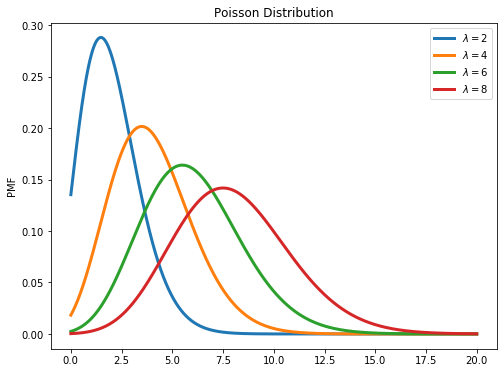

In [5]:
#collapse-hide
def poisson(x,mu):
    return np.exp(-mu)*np.power(mu, x)/factorial(x)
t = np.arange(0, 20, 0.01)
for mu in range(2,10,2):
    d = poisson(t,mu)
    plt.plot(t, d,linewidth=3, label = f"$\lambda = {mu}$")
    plt.legend(loc='best')
plt.title('Poisson Distribution')
plt.ylabel('PMF')
plt.show()

### Geometric Distribution
Geometric Distribution is a discrete probability distribution of a random variables $X$ that models number of trials needed needed to get the first success for $n$ repeated independent Bernoulli trials. The probability mass function for the same is

$$ P(X=x) = (1-p)^{x-1}p $$ 

$$ \mu = \frac{1}{p} $$ 

$$ \sigma^2 = \frac{1-p}{p^2} $$
